In [1]:
import os
import re
import glob
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors
from mpl_interactions import ioff, panhandler, zoom_factory
import numpy as np

In [46]:
hits = pd.read_hdf("../data/nexus/ATPC_eminus_100to500keV_slim.h5", "MC/hits")
parts = pd.read_hdf("../data/nexus/ATPC_eminus_100to500keV_slim.h5", "MC/particles")

display(parts)


,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,...,initial_momentum_x,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length,creator_proc,final_proc
0,0,1,e-,1,0,0.000000,0.000000,0.000000,0.000000,16.234713,...,-0.448174,0.151690,-0.382287,0.0,0.0,-0.0,0.283440,286.351868,none,eIoni
1,0,86,e-,0,1,15.232481,23.394255,15.932719,1.477970,15.226192,...,-0.041594,0.022861,0.013960,-0.0,0.0,-0.0,0.002389,0.131943,eIoni,eIoni
2,0,85,e-,0,1,12.844099,22.679195,15.457308,1.441970,12.843308,...,-0.003472,-0.000109,-0.003325,0.0,-0.0,-0.0,0.000023,0.001596,eIoni,msc
3,0,84,e-,0,1,12.844099,22.679195,15.457308,1.441970,12.843926,...,-0.002526,0.002910,0.002875,-0.0,-0.0,-0.0,0.000023,0.000328,eIoni,msc
4,0,83,e-,0,1,12.844099,22.679195,15.457308,1.441970,12.844275,...,0.000740,-0.000742,-0.004463,0.0,0.0,0.0,0.000021,0.001354,eIoni,msc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119080,999,6,e-,0,1,18.022358,-5.752217,-24.769873,0.283722,18.018829,...,-0.028335,-0.018300,0.009610,0.0,-0.0,0.0,0.001202,0.062877,eIoni,eIoni
119081,999,5,e-,0,1,17.670134,0.723855,-27.777456,0.232421,17.666248,...,-0.031998,0.006422,0.024896,0.0,0.0,-0.0,0.001646,0.033034,eIoni,eIoni
119082,999,4,e-,0,1,17.728380,0.847208,-27.753180,0.231667,17.741737,...,0.029933,-0.016573,0.007842,-0.0,-0.0,0.0,0.001204,0.046915,eIoni,eIoni
119083,999,3,e-,0,1,13.290862,11.479648,-13.291918,0.115575,13.297510,...,-0.001127,0.038870,-0.008705,0.0,-0.0,-0.0,0.001551,0.058459,eIoni,eIoni


,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,...,initial_momentum_x,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length,creator_proc,final_proc
1197,10,1,e-,1,0,0.0,0.0,0.0,0.0,-62.927151,...,-0.451224,0.197562,0.261004,-0.0,0.0,0.0,0.245227,236.626083,none,eIoni


,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,...,initial_momentum_x,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length,creator_proc,final_proc
1288,11,1,e-,1,0,0.000000,0.000000,0.000000,0.000000,7.081558,...,-0.260895,0.380314,0.176204,-0.0,-0.0,0.0,0.199545,130.290009,none,eIoni
1311,11,17,e-,0,1,1.730162,63.421684,25.932985,0.547973,-0.461202,...,-0.017501,0.157654,-0.099022,0.0,0.0,0.0,0.033139,10.514907,eIoni,eIoni


,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,...,initial_momentum_x,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length,creator_proc,final_proc
1357,12,1,e-,1,0,0.000000,0.000000,0.000000,0.000000,-10.427295,...,-0.004448,0.327109,0.187099,0.0,0.0,0.0,0.123939,32.433598,none,eIoni
1373,12,2,e-,0,1,1.234934,3.097647,1.372582,0.021542,-1.585919,...,0.106801,0.150442,0.152652,-0.0,-0.0,0.0,0.053325,15.773839,eIoni,eIoni


,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,...,initial_momentum_x,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length,creator_proc,final_proc
1409,13,1,e-,1,0,0.0,0.0,0.0,0.0,52.669426,...,0.132156,0.012415,0.462511,-0.0,-0.0,0.0,0.190895,171.16095,none,eIoni


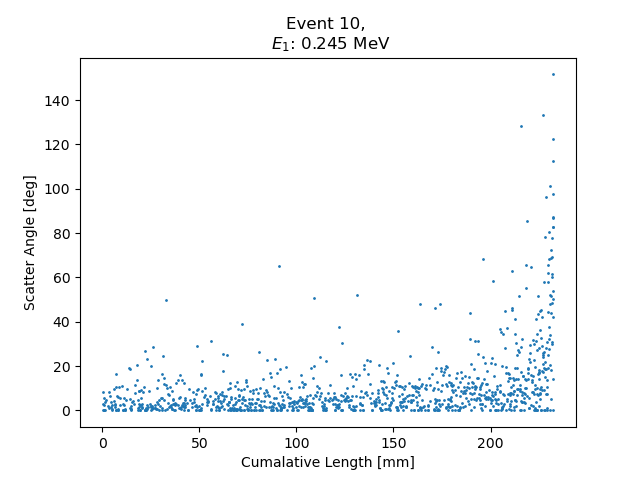

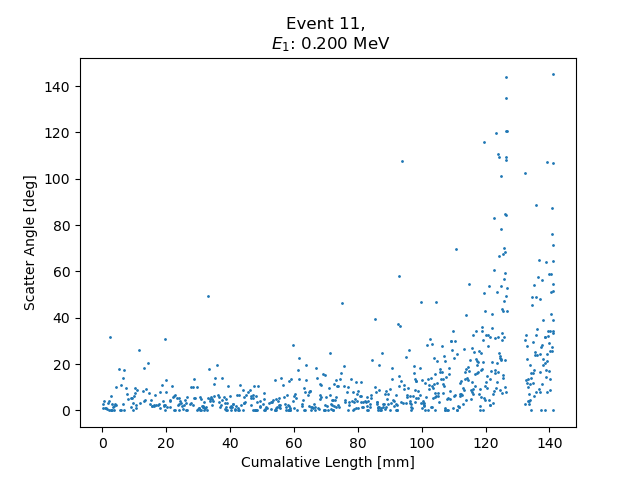

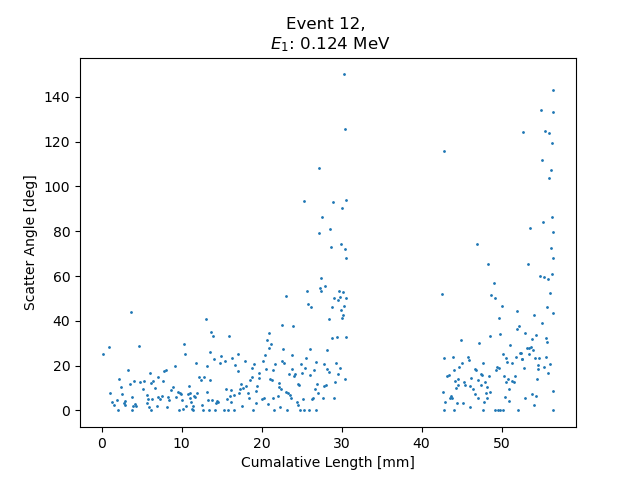

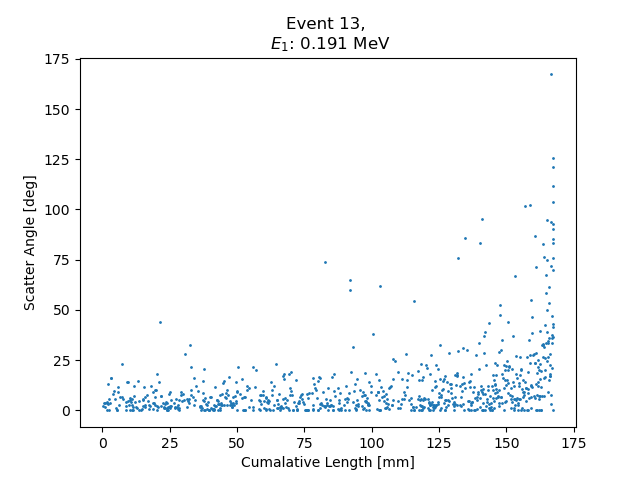

In [65]:
    
for eid in hits.event_id.unique():

    if (eid <10): continue

    if (eid >13): break

    event_parts = parts[parts.event_id == eid]
    display(event_parts[event_parts.length > 10])
    long_tracks = event_parts[event_parts.length > 10]


    # df = hits[ (hits.event_id == eid) & (hits.particle_id == 1) ]
    df = hits[ (hits.event_id == eid) & (hits.particle_id.isin(long_tracks.particle_id.unique())) ]

    df = df[['x', 'y', 'z']]

    # Assuming df is your DataFrame with columns x, y, z
    # Calculate vector differences between consecutive rows
    df['dx'] = df['x'].diff()
    df['dy'] = df['y'].diff()
    df['dz'] = df['z'].diff()

    # Calculate the lengths of the vectors
    df['length'] = np.sqrt(df['dx']**2 + df['dy']**2 + df['dz']**2)

    # Calculate the cumulative length
    df['cum_length'] = df['length'].cumsum()

    # Calculate the dot product and magnitudes for angle calculation
    dot_products = (df['dx'].shift(-1) * df['dx'] + df['dy'].shift(-1) * df['dy'] + df['dz'].shift(-1) * df['dz']).fillna(0)
    magnitudes = (df['length'] * df['length'].shift(-1)).fillna(0)

    # Calculate the cosines of the angles and handle division by zero
    cos_angles = np.where(magnitudes != 0, dot_products / magnitudes, 1)
    df['angle_rad'] = np.arccos(np.clip(cos_angles, -1.0, 1.0))  # Ensure values are within [-1, 1] for arccos

    # Drop NaN rows resulting from the shift operation
    df.dropna(inplace=True)

    # Convert angles from radians to degrees if needed
    df['angle_deg'] = np.degrees(df['angle_rad'])

    # Select only relevant columns
    result_df = df[['x', 'y', 'z', 'cum_length', 'angle_deg']]

    # display(df_angles)

    plt.figure()
    plt.scatter(result_df.cum_length,result_df.angle_deg, s= 1)

    E1 = event_parts[event_parts.particle_id == 1].kin_energy.iloc[0]
    plt.title(f"Event {eid}, \n $E_1$: {E1:.3f} MeV")
    plt.xlabel("Cumalative Length [mm]")
    plt.ylabel("Scatter Angle [deg]")

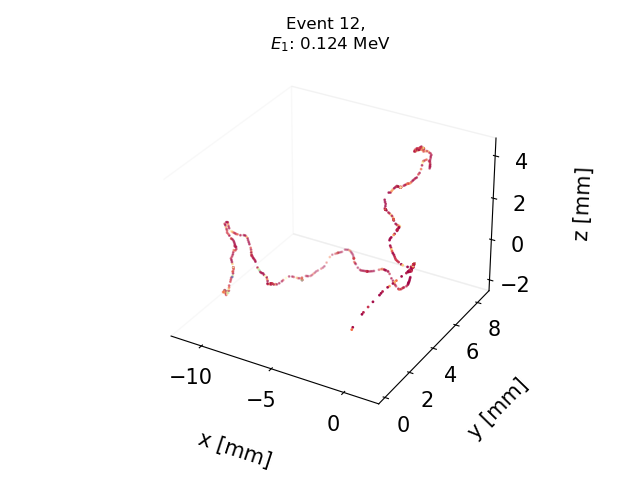

In [66]:
%matplotlib widget

# list = signal_events
# df   = combined_df_sig
# df_parts = combined_df_sig_part
# name = "SigMisclassified"
# sig = True


list = [12]

for eid in list:
    event_hits = hits[hits.event_id == eid]
    

    event_parts = parts[parts.event_id == eid]

    # Make a 3D view of the track
    # fig  = plt.figure(figsize=(10, 10))
    with plt.ioff():
        fig, axis = plt.subplots()

    # Create 3D axes
    ax = fig.add_subplot(111, projection='3d')

    fig.set_facecolor('white')
    ax.set_facecolor('white')
    # ax.scatter(df.x, df.y,  df.z,c= df.energy, cmap='Spectral', s=0.1, label = "reco hits")
    ax.scatter(event_hits.x, event_hits.y,  event_hits.z,c= event_hits.energy, cmap='Spectral', s=1, label = "reco hits")

    ax.set_xlabel("x [mm]", fontsize = 15, labelpad=20)
    ax.set_ylabel("y [mm]", fontsize = 15, labelpad=20)
    ax.set_zlabel("z [mm]", fontsize = 15, labelpad=20)
    plt.tick_params(axis='both', which='both', labelsize=15)  # Adjust labelsize as needed

    # Set the color of the axes labels and ticks to white
    ax.xaxis.label.set_color('black')
    ax.yaxis.label.set_color('black')
    ax.zaxis.label.set_color('black')
    ax.tick_params(axis='x', colors='black')
    ax.tick_params(axis='y', colors='black')
    ax.tick_params(axis='z', colors='black')

    # Set the color of the spines (borders) to white
    ax.spines['bottom'].set_color('black')
    ax.spines['top'].set_color('black')
    ax.spines['right'].set_color('black')
    ax.spines['left'].set_color('black')

    # Remove background (axis)
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False

    # ax.set_xlim(-100, 400)
    # ax.set_ylim(0, 1000)
    # ax.set_zlim(1500, 3000)


    E1 = event_parts[event_parts.particle_id == 1].kin_energy.iloc[0]
    ax.set_title(f"Event {eid}, \n $E_1$: {E1:.3f} MeV")

    # legend = plt.legend(facecolor = "black")

    # Set the text color of the legend
    # for text in legend.get_texts():
    #     text.set_color('white')  # Set the text color to red

    ax.grid(False)
    axis.axis('off')

    disconnect_zoom = zoom_factory(axis)
    # Enable scrolling and panning with the help of MPL
    # Interactions library function like panhandler.
    pan_handler = panhandler(fig)
    display(fig.canvas)

    # plt.savefig(f"../data/{name}/Event{eid}.png",dpi=500)
    # pd.set_option('display.max_rows', 1000)
    # display(event_parts)
